# ***Group 7: Alcoholic Beverages Recommendation***

---



# step1. Data pre-processing

### 1.1 Read data(資料讀取)
if use google colabaratory to execute, don't need to change anything, just upload file

if not, data not in same file folder, need to change to your direction in your computer

jupyter notebook is a good choice

In [ ]:
import pandas as pd
import os
import numpy as np


#change to your direction
dir=""


In [ ]:
filename='wine_data_2.xlsx' #讀取檔案
data=pd.read_excel(dir+filename)
#data

In [ ]:
X = data.drop(columns=["description","points","price","title","Unnamed: 0"])#去除我不要的資料
X

,country,province,taster_name,variety
0,32,384,16,16
1,43,250,15,14
2,43,207,1,20
3,43,250,15,15
4,16,12,16,8
...,...,...,...,...
11417,16,38,16,1
11418,16,38,16,1
11419,16,38,16,1
11420,16,76,16,6


non-repetitive data in sheet"編碼表"

In [ ]:
X2 = pd.read_excel(dir+filename, '編碼表')


country2=X2['產地國家']
province2=X2['省']
taster_name2=X2['品酒師']
variety2=X2['酒種']


### 1.2 user input data

In [ ]:
data = pd.read_excel(dir+'wine_data_2.xlsx')

#************************ 1. user input country **************************
available_number = list(set(data['country'].tolist()))
available_number.sort()
for i in range(0,len(available_number),1):
  if type(country2[available_number[i]-1])==float:
    break
  else:
    print(str(available_number[i])+". "+country2[available_number[i]-1])

print('可輸入的數字: ',available_number)
inputcountry = input('請輸入country：')

#filter country with user's choise
data = data.loc[data['country']==int(inputcountry)]


#************************ 2. user input province **************************
available_number = list(set(data['province'].tolist()))
available_number.sort()

for i in range(0,len(available_number),1):
  if type(province2[available_number[i]-1])==float:
    break
  else:
    print(str(available_number[i])+". "+province2[available_number[i]-1])

#filter province with user's choise
print('可輸入的數字: ',available_number)
inputprovince = input('請輸入province(number)：')
data = data.loc[data['province']==int(inputprovince)]

#************************ 3. user input taster_name **************************
available_number = list(set(data['taster_name'].tolist()))
available_number.sort()

for i in range(0,len(available_number),1):
  if type(taster_name2[available_number[i]-1])==float:
    break
  else:
    print(str(available_number[i])+". "+taster_name2[available_number[i]-1])

#filter taster_name with user's choise
print('可輸入的數字: ',available_number)
inputtaster_name = input('請輸入taster_name(number)：')
data = data.loc[data['taster_name']==int(inputtaster_name)]

#************************ 4. user input variety **************************
available_number = list(set(data['variety'].tolist()))
available_number.sort()

for i in range(0,len(available_number),1):
  if type(variety2[available_number[i]-1])==float:
    break
  else:
    print(str(available_number[i])+". "+variety2[available_number[i]-1])

#filter variety with user's choise
print('可輸入的數字: ',available_number)
inputvariety = input('請輸入variety(number)：')
data = data.loc[data['variety']==int(inputvariety)]

#************************ 5. user input points **************************
available_number = list(set(data['points'].tolist()))
sorted_number = sorted(available_number)
if available_number==[]:
  print('篩選無結果 請重新選擇')
else:
  print(sorted_number)
  print('目前篩選過後酒之最高分數: ', sorted_number[len(sorted_number)-1])
  inputPoint = input('所想要的酒>=幾分?:')
  data = data.loc[data['points']>=int(inputPoint)]

print(data)

#************************ 6. user input price **************************
available_number = list(set(data['price'].tolist()))
if available_number==[]:
  print('篩選無結果 請重新選擇')
else:
  sorted_number = sorted(available_number)
  print('目前篩選過後酒的最高價格: ',sorted_number[0])
  inputPrice = input('所想要的酒>=多少錢?:')
  data = data.loc[data['price']>=int(inputPrice)]

data_baseOn_user_input = data
Input_number=[int(inputcountry),int(inputprovince),int(inputtaster_name),int(inputvariety)]
Input_number_2=[int(inputcountry),int(inputprovince),int(inputtaster_name),int(inputvariety),int(inputPoint),int(inputPrice)]
Input_value=[country2[int(inputcountry)],province2[int(inputprovince)],taster_name2[int(inputtaster_name)],variety2[int(inputvariety)],int(inputPoint),int(inputPrice)]


1. Argentina
3. Australia
4. Austria
6. Brazil
7. Bulgaria
8. Canada
9. Chile
11. Croatia
12. Cyprus
13. Czech Republic
15. England
16. France
17. Georgia
18. Germany
19. Greece
20. Hungary
21. India
22. Israel
23. Italy
24. Lebanon
25. Luxembourg
27. Mexico
28. Moldova
29. Morocco
30. New Zealand
31. Peru
32. Portugal
33. Romania
36. Slovenia
37. South Africa
38. Spain
40. Turkey
42. Uruguay
43. US
可輸入的數字:  [1, 3, 4, 6, 7, 8, 9, 11, 12, 13, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 27, 28, 29, 30, 31, 32, 33, 36, 37, 38, 40, 42, 43]
請輸入country：1
251. Neusiedlersee
388. Valle de Guadalupe
可輸入的數字:  [251, 388]
請輸入province(number)：251
13. Michael Schachner
可輸入的數字:  [13]
請輸入taster_name(number)：13
3. Aglianico
4. Aidani
6. Albana
10. Aleatico
11. Alfrocheiro
13. Alicante Bouschet
14. Aligot
15. alkaras
18. Alvarelho
23. Apple
25. Aragons
26. Argaman
28. Arneis
29. Asprinio
可輸入的數字:  [3, 4, 6, 10, 11, 13, 14, 15, 18, 23, 25, 26, 28, 29]
請輸入variety(number)：4
[81, 82, 84, 85, 87, 88]
目前篩選過後酒之

In [ ]:
data_baseOn_user_input

,Unnamed: 0,country,description,points,price,province,taster_name,title,variety
3941,3942,1,Berry and lemon-peel aromas come with a note o...,82,11,251,13,Casa Montes 2014 Ampakama Cabernet Sauvignon (...,4
3946,3947,1,Earthy plum and raspberry aromas are probing a...,82,11,251,13,Quara 2015 Estate Cabernet Sauvignon (Cafayate),4
6804,6805,1,Bubble gum on the nose makes you wonder about ...,84,13,251,13,Michel Torino 2007 Cuma Organic Cabernet Sauvi...,4
7479,7480,1,"Dry and medium in body, this Cab from a warm v...",88,19,251,13,Familia Schroeder 2009 Saurus Select Cabernet ...,4
8489,8490,1,"Incredibly candied and sweet smelling, much li...",82,8,251,13,Santa Florentina 2009 Cabernet Sauvignon (Fama...,4
8998,8999,1,"Simple and easy to like, with cassis and cherr...",87,20,251,13,Graffigna 2006 Grand Reserve Cabernet Sauvigno...,4
11034,11035,1,Opens with red fruit aromas that are like a mi...,85,12,251,13,Familia Schroeder 2007 Saurus Patagonia Cabern...,4



# Step2. Cluster Analysis: K-Meams
(已量化的資料做Kmeans分群-elbow method)

#### 2.1 find out the most fitable k to devide into k groups

from dataset that user input's variable(4 variable:country、provice、taster_name、variaty)

In [ ]:
from sklearn import cluster, datasets, metrics
import matplotlib.pyplot as plt
import pandas as pd
import jieba
import jieba.analyse
from wordcloud import WordCloud
import numpy as np

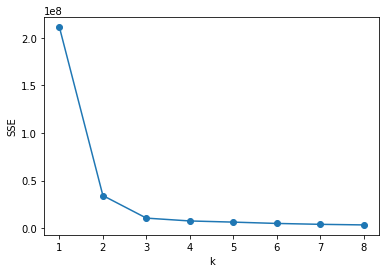

0    5923
1    5499
Name: kmeans, dtype: int64

In [ ]:
data = pd.read_excel(dir+'wine_data_2.xlsx')
data = data.drop(columns=["description","points","price","title","Unnamed: 0"])
X = data

SSE = []  # 存放每次結果的誤差平方和
for k in range(1, 9):
     # 構造聚類器
    estimator = cluster.KMeans(n_clusters = k).fit(X)
    SSE.append(estimator.inertia_)
X = range(1, 9)
plt.xlabel('k')
plt.ylabel('SSE')
plt.plot(X, SSE, 'o-')
plt.show()

X = data
#X = data_baseOn_user_input
# for k in range(1, 10):
estimator = cluster.KMeans(n_clusters = 2).fit(X)
X['kmeans'] = estimator.labels_
X['kmeans'].value_counts()

#### 2.2 add kmeans column in original file

#### write into output.xlsx

(讀取原黨,加入kmeans值,並且匯出為output.xlsx)

In [ ]:
filename='wine_data_2.xlsx' #讀取檔案
data=pd.read_excel(dir+filename)
#data

In [ ]:

col_name=data.columns.tolist()
print(col_name)

col_name.insert(9,"kmeans")
data=data.reindex(columns=col_name)
print(col_name)

data["kmeans"]=X["kmeans"]
print(data)


['Unnamed: 0', 'country', 'description', 'points', 'price', 'province', 'taster_name', 'title', 'variety']
['Unnamed: 0', 'country', 'description', 'points', 'price', 'province', 'taster_name', 'title', 'variety', 'kmeans']
       Unnamed: 0  country  ... variety  kmeans
0               1       32  ...      16       0
1               2       43  ...      14       0
2               3       43  ...      20       0
3               4       43  ...      15       0
4               5       16  ...       8       1
...           ...      ...  ...     ...     ...
11417       11418       16  ...       1       1
11418       11419       16  ...       1       1
11419       11420       16  ...       1       1
11420       11421       16  ...       6       1
11421       11422       38  ...      27       0

[11422 rows x 10 columns]


In [ ]:
data = pd.DataFrame(data)
data.to_excel(dir+"output.xlsx",sheet_name="Data")

# Step3. machine learning

#### 3.1 Define Model

In [ ]:
data = pd.read_excel('output.xlsx')
data = data.drop(columns=["description","points","price","title","Unnamed: 0.1","Unnamed: 0"])#去除我不要的資料
X = data.drop(columns=["kmeans"])
y = data["kmeans"]

In [ ]:
print(X.columns.tolist())
print(X.shape)

['country', 'province', 'taster_name', 'variety']
(11422, 4)


Split Data

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

X_train

,country,province,taster_name,variety
8991,43,52,19,4
3900,30,142,9,23
6843,43,52,8,13
7425,43,238,2,11
10050,43,52,12,15
...,...,...,...,...
2699,16,49,16,6
5254,43,52,12,4
7614,43,149,17,26
2603,43,375,17,1


##### 3.1.1 Logistic Regression Model

In [ ]:
from sklearn.linear_model import LogisticRegression

def logit( X_train, X_test, y_train, y_test):
    lr = LogisticRegression(solver='lbfgs')
    # train(訓練模型)
    lr.fit(X_train, y_train)
    y_predict = lr.predict(X_test)
    # result(結果)
    logit_score = lr.score(X_test, y_test)
    return logit_score


Input_number=np.array([Input_number])
print(Input_number.shape)
print(Input_number)

lr = LogisticRegression(solver='lbfgs')
lr.fit(X_train, y_train)
y_predict = lr.predict(Input_number)
print(y_predict)

#print(X_train)

(1, 4)
[[  1 251  13   4]]
[0]


##### 3.1.2 Support Vector Machine

In [ ]:
from sklearn import svm


def SVM( X_train, X_test, y_train, y_test):
    # train(訓練模型)
    svc_clf = svm.SVC(gamma='scale', kernel='sigmoid')
    svc_clf.fit(X_train, y_train)
    y_predict = svc_clf.predict(X_test)
    # result(結果)
    svc_score = svc_clf.score(X_test, y_test)
    return svc_score

#test Input_number
svc_clf = svm.SVC(gamma='scale', kernel='sigmoid')
svc_clf.fit(X_train, y_train)
y_predict = svc_clf.predict(Input_number)
print(y_predict)

[0]


##### 3.1.3 Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

def Deci( X_train, X_test, y_train, y_test):
    #train(訓練)
    tree = DecisionTreeClassifier(criterion='entropy')
    tree.fit(X_train, y_train)
    y_predict = tree.predict(X_test)
    #result(結果)
    deci_score = tree.score(X_test, y_test)
    return deci_score

#test Input_number
tree = DecisionTreeClassifier(criterion='entropy')
tree.fit(X_train, y_train)
y_predict = tree.predict(Input_number)
print(y_predict)

[0]


#### 3.2 test Model

In [ ]:
list_data = []

#X_train, X_test, y_train, y_test = split(X, y)

#logit
logit_score = logit(X_train, X_test, y_train, y_test)
#svm
svc_score= SVM(X_train, X_test, y_train, y_test)

#deci
deci_score= Deci(X_train, X_test, y_train, y_test)

list_data.append([
    logit_score, svc_score, deci_score
])

col_name = [
    "Logit_Precision",
    "SVM_Precision",
    "Deci_Precision",
]

pd_result = pd.DataFrame(list_data, columns=col_name)

>  show each method's precision










In [ ]:
pd_result

,Logit_Precision,SVM_Precision,Deci_Precision
0,1.0,0.770061,1.0


> Choose Decision Tree to test user data

> Find user data belongs to which group


In [ ]:
print(Input_value)
print(Input_number)

['Armenia', 'Nevada', 'Mike DeSimone', 'Airen', 82, 3]
[[  1 251  13   4]]


In [ ]:
#Decision Tree to test Input_number
tree = DecisionTreeClassifier(criterion='entropy')
tree.fit(X_train, y_train)
y_predict = tree.predict(Input_number)
print(y_predict[0])

group_num=y_predict[0]

print("the test value belongs to group",group_num+1)

0
the test value belongs to group 1


In [ ]:
data = pd.read_excel('output.xlsx')
data_baseOn_user_input=data.loc[(data['country']==Input_number_2[0])&(data['variety']==Input_number_2[3])&(data['points']>Input_number_2[4])&(data['price']>Input_number_2[5])]
data_baseOn_user_input

,Unnamed: 0,Unnamed: 0.1,country,description,points,price,province,taster_name,title,variety,kmeans
150,150,151,1,"A medium-weight Cabernet with plum, prune, tob...",89,30,388,13,Sottano 2009 Reserva de Familia Cabernet Sauvi...,4,0
442,442,443,1,"Saucy berry and tea aromas are herbal, earthy ...",85,14,388,13,Domaine Bousquet 2015 Cabernet Sauvignon (Tupu...,4,0
608,608,609,1,"Coconut and dill aromas rise from the nose, an...",88,20,388,13,Pascual Toso 2007 Reserve Las Barrancas Vineya...,4,0
734,734,735,1,Aromas of blackberry and briar patch expand to...,88,19,388,13,Zolo 2014 Reserve Estate Grown Cabernet Sauvig...,4,0
927,927,928,1,Rather sweet and medicinal; the wine comes int...,85,10,388,13,Finca Sophenia 2006 Altosur Cabernet Sauvignon...,4,0
...,...,...,...,...,...,...,...,...,...,...,...
10902,10902,10903,1,"Open-grain oak aromas are out front, followed ...",94,50,388,13,Pascual Toso 2014 Alta Barrancas Vineyards Cab...,4,0
10962,10962,10963,1,"This Cab opens with mellow, woody aromas on to...",89,22,388,13,Luigi Bosca 2010 Cabernet Sauvignon (Maip),4,0
11034,11034,11035,1,Opens with red fruit aromas that are like a mi...,85,12,251,13,Familia Schroeder 2007 Saurus Patagonia Cabern...,4,0
11247,11247,11248,1,Leafy aromas of tomato and green herbs pile on...,83,15,388,13,Angulo Innocenti 2014 Nonni Cabernet Sauvignon...,4,0


#Step4. Visualization: WordCloud

####4.1 use output.xlsx(include k-means result) to get the description data of user group

####and get the user variable data to get the description data 

In [ ]:
#********************* 拿出使用者所選擇變數後所有資料的敘述 ****************
i=0
gr_des=[]
gr_title=[]

for catch in data_baseOn_user_input.kmeans:
    if catch==group_num:
        des = data_baseOn_user_input.iloc[i,3]
        title = data_baseOn_user_input.iloc[i,8]
        gr_des.append(des)
        gr_title.append(title)
        i+=1
        #print(des)
    else:
        continue


#******************* 拿出使用者所屬的group的敘述 ********************
df = pd.read_excel(dir+'output.xlsx')

i=0
gr_des2=[]
gr_title2=[]

for catch in df.kmeans:
    if catch==group_num:
        des = df.iloc[i,3]
        title = df.iloc[i,8]
        gr_des2.append(des)
        gr_title2.append(title)
        i+=1
        #print(des)
    else:
        continue

In [ ]:
#print(len(gr_title))
#print(len(set(gr_title)))

#### 4.2 split user group's words and user choose variable data words
#### show top 25 words and their frequency
(斷詞+前N筆結果與權重)

In [ ]:
#******************* 切割使用者所選擇變數後所有資料的敘述 ********************
split1 = []
split2 = []

#斷詞
for ele in gr_des:
    text = ele
    split1 = jieba.lcut(text)
    split2.append(split1)

# 設定停用字(排除常用詞、無法代表特殊意義的字詞)
stopwords = {}.fromkeys(["come","but","finish","now","through"," ","，",".","with","on","the","it","This","is","It","flavors","Of"
              ,"and","I","t","in","are","note","while","notes","I t"])
#tf /idf
gr1_idf = jieba.analyse.extract_tags(str(split2), topK=25, withWeight=False)

for x, w in jieba.analyse.extract_tags(str(split2),topK=25, withWeight=True):
    print('%s %s' % (x, w))


with open(dir+'group'+str(group_num+1)+'_2.txt',"w") as f:
  for i in range(0,len(gr1_idf),1):
    f.write(str(gr1_idf[i])+" ")

print()
print()
#******************* 切割使用者所屬的group的敘述 ********************
split1 = []
split2 = []

#斷詞
for ele in gr_des2:
    text = ele
    split1 = jieba.lcut(text)
    split2.append(split1)

# 設定停用字(排除常用詞、無法代表特殊意義的字詞)
stopwords = {}.fromkeys(["come","but","finish","now","through"," ","，",".","with","on","the","it","This","is","It","flavors","Of"
              ,"and","I","t","in","are","note","while","notes","I t"])
#tf /idf
gr2_idf = jieba.analyse.extract_tags(str(split2), topK=25, withWeight=False)

for x, w in jieba.analyse.extract_tags(str(split2),topK=25, withWeight=True):
    print('%s %s' % (x, w))


with open(dir+'group'+str(group_num+1)+'_1.txt',"w") as f:
  for i in range(0,len(gr2_idf),1):
    f.write(str(gr2_idf[i])+" ")


Building prefix dict from the default dictionary ...
Dumping model to file cache /tmp/jieba.cache
Loading model cost 0.913 seconds.
Prefix dict has been built successfully.


flavors 0.35864302508699997
aromas 0.34605905929447367
finish 0.32718311060568417
berry 0.31459914481315787
herbal 0.2579712987467894
but 0.2202194013692105
palate 0.20134345268042103
plum 0.16988353819910523
cassis 0.13842362371778946
while 0.1321316408215263
fruit 0.12583965792526314
red 0.12583965792526314
notes 0.09437974344394735
full 0.0880877605476842
cherry 0.0880877605476842
spicy 0.0880877605476842
feels 0.08179577765142104
tannins 0.08179577765142104
Cabernet 0.0755037947551579
raspberry 0.0755037947551579
bit 0.0755037947551579
green 0.0755037947551579
nose 0.06921181185889473
fruits 0.06921181185889473
baked 0.06921181185889473


wine 0.2757091112495698
flavors 0.19818645407534605
fruit 0.1703746533377008
palate 0.14394979279432132
finish 0.12628455453051515
aromas 0.12445963322227072
black 0.11080922183660231
acidity 0.10701338551545389
tannins 0.10416650827459256
cherry 0.0988377380545188
but 0.08898316298999882
ripe 0.0867932574201055
red 0.07635470753694731
Drink 0.073

#### 4.3 WordCloud

1. according to user choose varianbles data


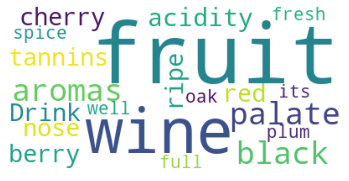

<Figure size 1000x600 with 0 Axes>


2. according to user group data


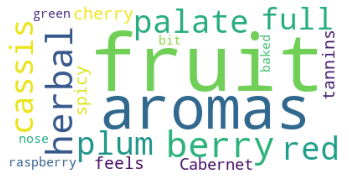

<Figure size 1000x600 with 0 Axes>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud

text1 = open(dir+'group'+str(group_num+1)+'_1.txt').read()
text2 = open(dir+'group'+str(group_num+1)+'_2.txt').read()

wc = WordCloud(background_color="white", #背景顏色
        max_words = 50 ,   #文字雲顯示最大詞數
        stopwords=stopwords)    #停用字詞
wc.generate(text1)
# 視覺化呈現
plt.imshow(wc)
plt.axis("off")
plt.figure(figsize=(10,6), dpi = 100)
print("1. according to user choose varianbles data")
plt.show()

print()
wc.generate(text2)
# 視覺化呈現
plt.imshow(wc)
plt.axis("off")
plt.figure(figsize=(10,6), dpi = 100)
print("2. according to user group data")
plt.show()

# **Recommand list**

#### ***1. show the similar alcoholic beverages recommand list from user group***

In [ ]:
from collections import Counter
title_counts = Counter(gr_title2)
# 頻率最高的幾個title
top = title_counts.most_common(10)

for i in range(0,len(top),1):
  print(str(i+1)+". "+top[i][0])

1. Chteau de Sours 2011 La Fleur d'Amlie  (Bordeaux Blanc)
2. Souverain 2010 Chardonnay (North Coast)
3. Tres Palacios 2011 Reserve Pinot Noir (Maipo Valley)
4. Undurraga 2001 Reserva Merlot (Maipo Valley)
5. Jacquart NV Brut Mosaque  (Champagne)
6. Quinta do Sagrado 2008 VT '08 Red (Douro)
7. Chteau Lamothe-Vincent 2008 Sauvignon  (Bordeaux Blanc)
8. Yvon Mau 2007 Premius Bordeaux Sauvignon  (Bordeaux Blanc)
9. Byzantium 2005 Rosso di Valachia Red (Dealu Mare)
10. Amavi 2011 Syrah (Walla Walla Valley (WA))


#### ***2. show the alcoholic beverages recommand list from user choose variable data***

In [ ]:
from collections import Counter
title_counts = Counter(gr_title)
# 頻率最高的幾個title
top = title_counts.most_common(10)

for i in range(0,len(top),1):
  print(str(i+1)+". "+top[i][0])


1. Sottano 2009 Reserva de Familia Cabernet Sauvignon (Mendoza)
2. Domaine Bousquet 2015 Cabernet Sauvignon (Tupungato)
3. Pascual Toso 2007 Reserve Las Barrancas Vineyards Cabernet Sauvignon (Mendoza)
4. Zolo 2014 Reserve Estate Grown Cabernet Sauvignon (Valle de Uco)
5. Finca Sophenia 2006 Altosur Cabernet Sauvignon (Tupungato)
6. Rutini 2012 Trumpeter Cabernet Sauvignon (Mendoza)
7. San Felipe 2012 Oak Cask Estate Bottled Cabernet Sauvignon (Mendoza)
8. Trapiche 2014 Oak Cask Cabernet Sauvignon (Mendoza)
9. Via Cobos 2007 Felino Cabernet Sauvignon (Mendoza)
10. Pulenta Estate 2008 La Flor Cabernet Sauvignon (Mendoza)


> choose a word in wordcloud

In [ ]:
for i in range(0,len(gr1_idf),1):
  print(str(i)+". "+gr1_idf[i])

word = input("choose a word in wordcloud: ")
print("your choice is: ",gr1_idf[int(word)])

0. flavors
1. aromas
2. finish
3. berry
4. herbal
5. but
6. palate
7. plum
8. cassis
9. while
10. fruit
11. red
12. notes
13. full
14. cherry
15. spicy
16. feels
17. tannins
18. Cabernet
19. raspberry
20. bit
21. green
22. nose
23. fruits
24. baked
choose a word in wordcloud: 24
your choice is:  baked


#### ***3. show the recommand list in wordcloud of user choose that in description***

In [ ]:
print("Title and Description")
print()

j=0
for i in range(0,len(gr_des),1):
  if gr1_idf[int(word)] in gr_des[i]:
    print(str(j+1)+". Title: "+gr_title[i])
    print(" "*3+"Description: "+gr_des[i])
    print()
    j=j+1

Title and Description

1. Title: Via Cobos 2007 Felino Cabernet Sauvignon (Mendoza)
   Description: Chunky, broad and slightly rubbery smelling, with baked aromas, leather and other more serious scents. The palate is full-bodied and warm, but not all that complex. Flavors of baked plums, cassis and licorice are nice, and the finish brings chocolate brownie into the game. For immediate drinking.

2. Title: Pulenta Estate 2008 La Flor Cabernet Sauvignon (Mendoza)
   Description: Foxy and jumpy smelling at first, with brambly raspberry aromas. The palate feels heavy and baked, with grabby tannins in support of herbal, mildly weedy berry fruit flavors. Finishes saucy, with a hint of tomato. Not pure and focused like the La Flor Malbec.

3. Title: Hollen Family Vineyards 2007 Cabernet Sauvignon (Mendoza)
   Description: Cedar, tobacco and dried-berry aromas are mature and spicy. This shows preserving acidity and flavors of caramel, baked berries and spice. It lasts long on the finish; drink